# Global Optimization
Finding the absolute maximum or minimum value of a function can be hard. For problems with a few tens of variables and only bound constraints the NAG solver [`glopt.bnd_mcs_solve`](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.glopt.html#naginterfaces.library.glopt.bnd_mcs_solve) for multi-level coordinate search (from Huyer and Neumaier) is an effective routine.

For a quick demonstration of `glopt.bnd_mcs_solve` we find the global minimum of the two-dimensional 'peaks' function, which (in a suitable form for the solver's `objfun` argument) is

In [1]:
from math import exp
objfun = lambda x, _nstate: (
    3.*(1. - x[0])**2*exp(-x[0]**2 - (x[1] + 1.)**2)
    - (10.*(x[0]/5. - x[0]**3 - x[1]**5)*exp(-x[0]**2 - x[1]**2))
    - 1./3.0*exp(-(x[0] + 1.)**2 - x[1]**2)
)

The optimization is over the box $[-3, -3]\times[3, 3]$

In [2]:
n = 2
bl = [-3.]*n
bu = [3.]*n

The `ibound` argument tells the solver that we are supplying the bounds explicitly ourselves

In [3]:
ibound = 0

The plot for this example is going to show the search boxes that the optimizer considers as it iterates. We can use the function's monitoring callback to store the boxes that it visits

In [4]:
from matplotlib.patches import Rectangle

boxes = []

def monit(
    _ncall, _xbest, _icount, _inlist, _numpts,
    _initpt, _xbaskt, boxl, boxu, _nstate,
):
    boxes.append(Rectangle(boxl, *(boxu - boxl)))

Before calling the optimizer we need to initialize its communication state

In [5]:
from naginterfaces.library import glopt
comm = glopt.bnd_mcs_init()

Now do the optimization. The monitoring function is an optional keyword argument. In this example we don't need to access any of the return data

In [6]:
glopt.bnd_mcs_solve(objfun, ibound, bl, bu, comm, monit=monit);

Grid the objective function for plotting

In [7]:
import numpy as np
delta = 0.025
x = np.arange(bl[0], bu[0], delta)
y = np.arange(bl[1], bu[1], delta)
X, Y = np.meshgrid(x, y)
Z = np.empty((len(X), len(Y)))
for i, x_i in enumerate(x):
    for j, y_j in enumerate(y):
        Z[j, i] = objfun([x_i, y_j], None)

Store the optimization start and end points for inclusion in the plot. For the routine's default 'simple' initialization method (`iinit = 0`) the start point (`initpt`) was at the origin

In [8]:
start_x = [0.]*n

Here is the known global minimum for the problem

In [9]:
min_x = [0.23, -1.63]

Aggregate the search boxes to include in the subsequent plot

In [10]:
from matplotlib.collections import PatchCollection
boxes_col = PatchCollection(
    boxes,
    edgecolor='b', facecolor='none', linewidth=0.2,
)

In [11]:
# Jupyter magic for displaying figures inline:
%matplotlib inline

Now assemble the plot

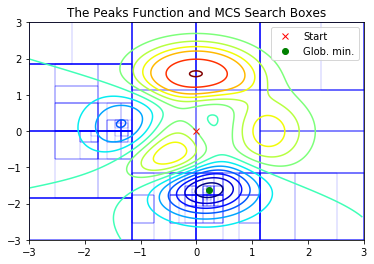

In [12]:
from matplotlib import cm
import matplotlib.pyplot as plt
ax = plt.axes()
ax.contour(
    X, Y, Z,
    levels=[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 6, 8],
    cmap=cm.jet,
)
ax.plot(start_x[0], start_x[1], 'rx')
ax.plot(min_x[0], min_x[1], 'go')
ax.legend(('Start', 'Glob. min.'), loc='upper right')
ax.add_collection(boxes_col)
ax.axis(xmin=bl[0], ymin=bl[1], xmax=bu[0], ymax=bu[1])
ax.set_title(r'The Peaks Function and MCS Search Boxes')
plt.show()